In [1]:
import tensorflow as tf
tf.__version__
tf.keras.backend.clear_session()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tqdm.notebook import tqdm
# tf.compat.v1.disable_v2_behavior()
# tf.compat.v1.disable_eager_execution()
# import keras.backend as K
# from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.backend import sigmoid
from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.regularizers import l1,l2, l1_l2
# from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Layer, Permute, multiply
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv1D, Dropout, Dense, BatchNormalization, AveragePooling1D, ReLU, LayerNormalization
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Lambda, Reshape, Flatten, SeparableConv1D, Activation, GlobalAveragePooling1D
from tensorflow.keras.layers import Input, Add, MaxPooling1D, MultiHeadAttention, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.compat.v1.keras.models import load_model
# from tensorflow.compat.v1.keras.layers import CuDNNGRU
import sklearn
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score

In [3]:
data_cbi= pd.read_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Refined_Data/CBI_final.csv')
data_bsi= pd.read_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Refined_Data/BSI_final.csv')
data_evi2= pd.read_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Refined_Data/EVI2_final.csv')
data_mndwi= pd.read_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Refined_Data/MNDWI_final.csv')
data_msavi= pd.read_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Refined_Data/MSAVI_final.csv')
data_nbr= pd.read_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Refined_Data/NBR_final.csv')
data_ndvi= pd.read_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Refined_Data/NDVI_final.csv')

In [4]:
#interpolate NaN for each row
# data_b2 = data_b2.apply(pd.to_numeric, errors='coerce')
# data_b3 = data_b3.apply(pd.to_numeric, errors='coerce')
# data_b4 = data_b4.apply(pd.to_numeric, errors='coerce')
# data_b5 = data_b5.apply(pd.to_numeric, errors='coerce')
# data_b6 = data_b6.apply(pd.to_numeric, errors='coerce')
# data_b7 = data_b7.apply(pd.to_numeric, errors='coerce')
# data_b8 = data_b8.apply(pd.to_numeric, errors='coerce')
# data_b8A = data_b8A.apply(pd.to_numeric, errors='coerce')
# data_b11 = data_b11.apply(pd.to_numeric, errors='coerce')
# data_b12 = data_b12.apply(pd.to_numeric, errors='coerce')

data_cbi_ = data_cbi.values
data_bsi_ = data_bsi.values
data_evi2_ = data_evi2.values
data_mndwi_ = data_mndwi.values
data_msavi_ = data_msavi.values
data_nbr_ = data_nbr.values
data_ndvi_ = data_ndvi.values

cbi_pd = pd.DataFrame(data_cbi_)
bsi_pd = pd.DataFrame(data_bsi_)
evi2_pd = pd.DataFrame(data_evi2_)
mndwi_pd = pd.DataFrame(data_mndwi_)
msavi_pd = pd.DataFrame(data_msavi_)
nbr_pd = pd.DataFrame(data_nbr_)
ndvi_pd = pd.DataFrame(data_ndvi_)

cbi_pd = cbi_pd.iloc[:,3:42].astype(float)
bsi_pd = bsi_pd.iloc[:,3:42].astype(float)
evi2_pd  = evi2_pd.iloc[:,3:42].astype(float)
mndwi_pd  = mndwi_pd.iloc[:,3:42].astype(float)
msavi_pd = msavi_pd.iloc[:,3:42].astype(float)
nbr_pd  = nbr_pd.iloc[:,3:42].astype(float)
ndvi_pd  = ndvi_pd.iloc[:,3:42].astype(float)

# data_b2_int = data_b2.interpolate(method='linear', limit_direction='both', axis=1)
# data_b3_int = data_b3.interpolate(method='linear', limit_direction='both', axis=1)
# data_b4_int = data_b4.interpolate(method='linear', limit_direction='both', axis=1)
# data_b5_int = data_b5.interpolate(method='linear', limit_direction='both', axis=1)
# data_b6_int = data_b6.interpolate(method='linear', limit_direction='both', axis=1)
# data_b7_int = data_b7.interpolate(method='linear', limit_direction='both', axis=1)
# data_b8_int = data_b8.interpolate(method='linear', limit_direction='both', axis=1)
# data_b8A_int = data_b8A.interpolate(method='linear', limit_direction='both', axis=1)
# data_b11_int = data_b11.interpolate(method='linear', limit_direction='both', axis=1)
# data_b12_int = data_b12.interpolate(method='linear', limit_direction='both', axis=1)

data_cbi_int = cbi_pd.interpolate(method='spline', order=3, limit_direction='both', axis=1)
data_bsi_int = bsi_pd.interpolate(method='spline', order=3, limit_direction='both', axis=1)
data_evi2_int = evi2_pd.interpolate(method='spline', order=3, limit_direction='both', axis=1)
data_mndwi_int = mndwi_pd.interpolate(method='spline', order=3, limit_direction='both', axis=1)
data_msavi_int = msavi_pd.interpolate(method='spline', order=3, limit_direction='both', axis=1)
data_nbr_int = nbr_pd.interpolate(method='spline', order=3, limit_direction='both', axis=1)
data_ndvi_int = ndvi_pd.interpolate(method='spline', order=3, limit_direction='both', axis=1)

# print('Number of nan for B2 after:', data_b2_int.isnull().sum().sum())
# print('Number of nan for B3 after:', data_b3_int.isnull().sum().sum())
# print('Number of nan for B4 after:', data_b4_int.isnull().sum().sum())
# print('Number of nan for B5 after:', data_b5_int.isnull().sum().sum())
# print('Number of nan for B6 after:', data_b6_int.isnull().sum().sum())
# print('Number of nan for B7 after:', data_b7_int.isnull().sum().sum())
# print('Number of nan for B8 after:', data_b8_int.isnull().sum().sum())
# print('Number of nan for B8A after:', data_b8A_int.isnull().sum().sum())
# print('Number of nan for B11 after:', data_b11_int.isnull().sum().sum())
# print('Number of nan for B12 after:', data_b12_int.isnull().sum().sum())
# 
print('Number of nan for CBI after:', np.count_nonzero(np.isnan(data_cbi_int)))
print('Number of nan for BSI after:', np.count_nonzero(np.isnan(data_bsi_int)))
print('Number of nan for EVI2 after:', np.count_nonzero(np.isnan(data_evi2_int)))
print('Number of nan for MNDWI after:', data_mndwi_int.isnull().sum().sum())
print('Number of nan for MSAVI after:', data_msavi_int.isnull().sum().sum())
print('Number of nan for NBR after:', data_nbr_int.isnull().sum().sum())
print('Number of nan for NDVI after:', data_ndvi_int.isnull().sum().sum())

Number of nan for CBI after: 0
Number of nan for BSI after: 0
Number of nan for EVI2 after: 0
Number of nan for MNDWI after: 0
Number of nan for MSAVI after: 0
Number of nan for NBR after: 0
Number of nan for NDVI after: 0


In [5]:
comb_all = pd.concat([data_cbi_int, data_bsi_int,
                      data_evi2_int, data_mndwi_int, 
                      data_msavi_int, data_nbr_int, data_ndvi_int], axis =0, ignore_index=True)

# comb_all = pd.concat([data_cbi_int, 
#                       data_bsi_int,  
#                       data_mndwi_int, data_nbr_int], axis =0, ignore_index=True)

In [6]:
# print(comb_all.shape)

In [7]:
# comb_all = pd.concat([data_cbi_int, data_bsi_int, data_evi2_int,
#                       data_mndwi_int, data_msavi_int, 
#                       data_nbr_int, data_ndvi_int], axis =0, ignore_index=True)

In [8]:
# comb_all_lc = pd.concat([data_cbi.iloc[:,0:3], data_bsi.iloc[:,0:3], data_evi2.iloc[:,0:3],
#                             data_mndwi.iloc[:,0:3], data_msavi.iloc[:,0:3],
#                             data_nbr.iloc[:,0:3], data_ndvi.iloc[:,0:3]], axis =0, ignore_index=True)

In [9]:
# print(comb_all_lc.Class.value_counts())

In [10]:
y = data_cbi.iloc[:,2]
y = np.asarray(y).astype(np.float32)
y_cat = to_categorical(y)
y_cat = y_cat[:,1:8] # num_class + 1

In [11]:
# print(y)

In [12]:
unique_classes, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique_classes, counts))
print("Class distribution:", class_distribution)

Class distribution: {1.0: 228, 2.0: 286, 3.0: 566, 4.0: 94, 5.0: 177, 6.0: 349, 7.0: 272}


In [13]:
# print(y.shape)

In [14]:
# print(y_cat)
# print(y_cat.shape)

In [15]:
# print(np.unique(y))

In [16]:
class_weights = compute_class_weight(class_weight = "balanced",
                                      classes = np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))
# class_weights = dict(zip(np.unique(train_classes), class_weights))
print(class_weights)

{0: 1.2355889724310778, 1: 0.985014985014985, 2: 0.4977284199899041, 3: 2.9969604863221884, 4: 1.5916061339790153, 5: 0.8072042570609906, 6: 1.0357142857142858}


In [17]:
comb_cbi = comb_all.iloc[0:1972:,:]
comb_bsi = comb_all.iloc[1972:3944:,:]
comb_evi2 = comb_all.iloc[3944:5916:,:]
comb_mndwi = comb_all.iloc[5916:7888:,:]
comb_msavi = comb_all.iloc[7888:9860:,:]
comb_nbr = comb_all.iloc[9860:11832:,:]
comb_ndvi = comb_all.iloc[11832:13804:,:]

comb_cbi= np.asarray(comb_cbi).astype(np.float64)
comb_bsi= np.asarray(comb_bsi).astype(np.float64)
comb_evi2= np.asarray(comb_evi2).astype(np.float64)
comb_mndwi= np.asarray(comb_mndwi).astype(np.float64)
comb_msavi= np.asarray(comb_msavi).astype(np.float64)
comb_nbr= np.asarray(comb_nbr).astype(np.float64)
comb_ndvi= np.asarray(comb_ndvi).astype(np.float64)

In [18]:
# print(comb_bsi.shape)

In [19]:
# comb_cbi = comb_all.iloc[0:1972:,:]
# comb_bsi = comb_all.iloc[1972:3944:,:]
# comb_evi2 = comb_all.iloc[3944:5916:,:]
# comb_mndwi = comb_all.iloc[5916:7888:,:]
# comb_msavi = comb_all.iloc[7888:9860:,:]
# comb_nbr = comb_all.iloc[9860:11832:,:]
# comb_ndvi = comb_all.iloc[11832:13804:,:]

# comb_cbi= np.asarray(comb_cbi).astype(np.float64)
# comb_bsi= np.asarray(comb_bsi).astype(np.float64)
# comb_evi2= np.asarray(comb_evi2).astype(np.float64)
# comb_mndwi= np.asarray(comb_mndwi).astype(np.float64)
# comb_msavi= np.asarray(comb_msavi).astype(np.float64)
# comb_nbr= np.asarray(comb_nbr).astype(np.float64)
# comb_ndvi= np.asarray(comb_ndvi).astype(np.float64)

In [20]:
comb_stack = np.stack((comb_cbi, comb_bsi, comb_evi2, 
                       comb_mndwi, comb_msavi, comb_nbr, comb_ndvi), axis=1)

# comb_stack = np.stack((comb_cbi, comb_bsi, comb_mndwi, comb_nbr), axis=1)

comb_stack_reshape = comb_stack.reshape(comb_stack.shape[0], comb_stack.shape[2], comb_stack.shape[1])
print(comb_stack_reshape.shape)

X_train, X_test, y_train, y_test = train_test_split(comb_stack_reshape , y_cat, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1972, 39, 7)
(1380, 39, 7) (1380, 7) (592, 39, 7) (592, 7)


In [21]:
# print(comb_cbi.shape)

In [22]:
# stack_ver = np.hstack((vert_cbi, vert_bsi, vert_evi2,
#                        vert_mndwi, vert_msavi, vert_nbr, 
#                        vert_ndvi))
# print(stack_ver.shape)

In [23]:
# import seaborn as sns 

# x = ['CBI','BSI','EVI2', 'MNDWI', 'MSAVI', 'NBR', 'NDVI']
# # enumerate label
# for i in enumerate(x):
#     print(i)

# # plot correlation matrix
# rf_pd = pd.DataFrame(data=stack_ver, columns=list(x))
# matrix = np.triu(rf_pd.corr())
# plt.figure(figsize=(12,8))
# sns.heatmap(rf_pd.corr(), annot=True, mask=matrix)

In [24]:
num_classes = len(np.unique(y))
input_shape=(X_train.shape[1], X_train.shape[2])
print(num_classes)
print(input_shape)

7
(39, 7)


In [25]:
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

tf.keras.utils.get_custom_objects().update({'swish': swish})

In [26]:
def ReshapeLayer(x):
    shape = x.shape
    # 1 possibility: H,W*channel
    reshape = Reshape((shape[1],shape[2]))(x)
    # 2 possibility: W,H*channel
    # transpose = Permute((2,1,3))(x)
    # reshape = Reshape((shape[1],shape[2]*shape[3]))(transpose)
    return reshape

In [27]:
def attention_block(inputs, output_shape):
    a = Permute((2, 1))(inputs)
    a = Dense(output_shape, activation='softmax')(a)
    a_probs = Permute((2, 1))(a)
    output_attention_mul = multiply([inputs, a_probs])
    return output_attention_mul

In [28]:
# %%time
#2nd best

# def make_model(input_shape):
#     input_layer = Input(input_shape)
    
# #     x = LayerNormalization()(input_layer)
# #     x = MultiHeadAttention(key_dim=128, num_heads=2, dropout=0)(x, x)
# #     x = Dropout(0.5)(x)
    
#     np.random.seed(16)
#     tf.random.set_seed(16)
    
#     init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=0)
    
#     x0 = Conv1D(64, 1, strides=1, activation="swish", padding = 'same', dilation_rate=1, kernel_initializer=init)(input_layer)
#     x0 = Conv1D(64, 1, strides=1, activation="swish", padding = 'same', dilation_rate=1, kernel_initializer=init)(x0)
#     x0 = LayerNormalization()(x0)
#     x0 = Dropout(0.5)(x0)
    
#     x01 = Conv1D(64, 1, activation="swish", padding = 'same', dilation_rate=1, kernel_initializer=init)(x0)
#     x01 = Conv1D(64, 1, activation="swish", padding = 'same', dilation_rate=1, kernel_initializer=init)(x01)
#     x01 = LayerNormalization()(x01)
#     x01 = Dropout(0.5)(x01)
    
#     x02 = Conv1D(64, 1, activation="swish", padding = 'same', dilation_rate=1, kernel_initializer=init)(x01)
#     x02 = Conv1D(64, 1, activation="swish", padding = 'same', dilation_rate=1, kernel_initializer=init)(x02)
#     x02 = LayerNormalization()(x02)
#     x02 = Dropout(0.5)(x02)
    
#     add_ = tf.keras.layers.add([x0, x02])
    
#     xfin = Lambda(ReshapeLayer)(add_)
#     xfin = Bidirectional(GRU(64, activation='tanh', return_sequences=False))(xfin)
# #     xfin = Dense(128, activation="swish")(xfin)
# #     xfin = Dense(64, activation="swish")(xfin)
#     xfin = LayerNormalization()(xfin)
#     xfin = Dropout(0.75)(xfin)

#     output_layer = Dense(num_classes, activation="softmax")(xfin)

#     return Model(inputs=input_layer, outputs=output_layer)

# model = make_model(input_shape= input_shape)
# model.summary()
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#                     optimizer=optimizers.Adam(learning_rate=0.001), 
#                     metrics=['accuracy'])

# checkpoint = ModelCheckpoint(filepath='D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Saved_Model/LC_DAS_Citarum_exp03_stable.h5',
#                               monitor='val_accuracy',save_best_only=True,verbose=1)
# early_stop = EarlyStopping(monitor='val_accuracy',patience=100,restore_best_weights=True,mode='max')
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,patience=30, min_lr=0.00001)

# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size =20,
#                     epochs=500, callbacks = [checkpoint, early_stop, reduce_lr], 
#                     class_weight=class_weights)

In [29]:
import tensorflow as tf
from tensorflow.keras.metrics import Metric

class CustomMeanIoU(Metric):
    def __init__(self, num_classes, name='custom_mean_iou', **kwargs):
        super(CustomMeanIoU, self).__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.confusion_matrix = self.add_weight(
            'confusion_matrix',
            shape=(num_classes, num_classes),
            initializer='zeros',
            dtype=tf.float32)
            
    def update_state(self, y_true, y_pred, sample_weight=None):
        # First, ensure y_pred is class indices (argmax) and cast to int32
        if len(tf.shape(y_pred)) > 1 and tf.shape(y_pred)[-1] > 1:
            y_pred = tf.cast(tf.argmax(y_pred, axis=-1), tf.int32)
        else:
            # If not one-hot, ensure it's still int32
            y_pred = tf.cast(y_pred, tf.int32)
        
        # Then ensure y_true is the same format (class indices as int32)
        if len(tf.shape(y_true)) > 1 and tf.shape(y_true)[-1] > 1:
            y_true = tf.cast(tf.argmax(y_true, axis=-1), tf.int32)
        else:
            # If not one-hot, ensure it's still int32
            y_true = tf.cast(y_true, tf.int32)
            
        # Convert to 1D tensors
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])
        
        # Calculate confusion matrix
        cm_update = tf.math.confusion_matrix(
            y_true, y_pred, self.num_classes, 
            dtype=tf.float32)
        
        # Update the total confusion matrix
        self.confusion_matrix.assign_add(cm_update)
        
    def result(self):
        cm = self.confusion_matrix
        
        # Extract per-class TP, FP, FN
        tp = tf.linalg.diag_part(cm)
        sum_over_row = tf.reduce_sum(cm, axis=1)
        sum_over_col = tf.reduce_sum(cm, axis=0)
        fp = sum_over_col - tp
        fn = sum_over_row - tp
        
        # Calculate IoU per class
        denominator = tp + fp + fn
        
        # Avoid division by zero
        iou = tf.math.divide_no_nan(tp, denominator)
        
        # Calculate mean IoU (average over classes)
        valid_classes = tf.cast(denominator > 0, tf.float32)
        num_valid = tf.reduce_sum(valid_classes)
        
        # Return mean IoU
        return tf.math.divide_no_nan(tf.reduce_sum(iou), num_valid)
        
    def reset_state(self):
        # Reset the confusion matrix at the start of each epoch
        self.confusion_matrix.assign(tf.zeros((self.num_classes, self.num_classes)))

    def get_config(self):
        config = super(CustomMeanIoU, self).get_config()
        config.update({"num_classes": self.num_classes})
        return config

In [30]:
%%time

from tensorflow.keras.metrics import MeanIoU
#Best set up

def make_model(input_shape):
    input_layer = Input(input_shape)
    
#     x = LayerNormalization()(input_layer)
#     x = MultiHeadAttention(key_dim=64, num_heads=2, dropout=0.5)(x, x)
#     x = Dropout(0.5)(x)
    
#     np.random.seed(16)
#     tf.random.set_seed(16)
    
#     init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=0)
        
    x0a = Conv1D(64, 3, activation="swish", padding = 'same')(input_layer)
    x0a = Conv1D(64, 3, activation="swish", padding = 'same')(x0a)
    
    x01a = Conv1D(16, 3, activation="swish", padding = 'same')(x0a)
    x01a = Conv1D(16, 3, activation="swish", padding = 'same')(x01a)
    
    x02 = Conv1D(64, 3, activation="swish", padding = 'same')(x01a)
    x02 = Conv1D(64, 3, activation="swish", padding = 'same')(x02)
    
    add_1 = tf.keras.layers.add([x0a, x02])
    add_1 = LayerNormalization()(add_1)
    
    x03 = Conv1D(16, 3, activation="swish", padding = 'same')(add_1)
    
    x04 = Conv1D(64, 3, activation="swish", padding = 'same')(x03)
    x04 = Conv1D(64, 3, activation="swish", padding = 'same')(x04)
    x04 = LayerNormalization()(x04)
    
    xfin = Lambda(ReshapeLayer)(x04)
    xfin = Bidirectional(GRU(64, activation='tanh', return_sequences=False))(xfin)
    xfin = Dropout(0.5)(xfin)

    output_layer = Dense(num_classes, activation="softmax")(xfin)

    return Model(inputs=input_layer, outputs=output_layer)

model = make_model(input_shape= input_shape)
model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=optimizers.AdamW(learning_rate=0.001), 
              metrics=[CustomMeanIoU(num_classes=7)])
# metrics=['accuracy']

checkpoint = ModelCheckpoint(filepath='D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Saved_Model/LC_DAS_Citarum_exp03_stable_mIoU.h5',
                              monitor='val_custom_mean_iou',save_best_only=True,verbose=1, mode='max')
early_stop = EarlyStopping(monitor='val_custom_mean_iou',patience=100,restore_best_weights=True,mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_custom_mean_iou', factor=0.1,patience=30, min_lr=0.00001)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size =20,
                    epochs=500, callbacks = [checkpoint, early_stop, reduce_lr], 
                    class_weight=class_weights)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 39, 7)]              0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 39, 64)               1408      ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 39, 64)               12352     ['conv1d[0][0]']              
                                                                                                  
 conv1d_2 (Conv1D)           (None, 39, 16)               3088      ['conv1d_1[0][0]']            
                                                                                              

D:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 10s 58ms/step - loss: 1.2173 - custom_mean_iou: 0.3859 - val_loss: 0.7498 - val_custom_mean_iou: 0.5354 - lr: 0.0010
Epoch 2/500
69/69 [==============================] - ETA: 0s - loss: 0.6460 - custom_mean_iou: 0.6351
Epoch 2: val_custom_mean_iou improved from 0.53541 to 0.66445, saving model to D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Saved_Model\LC_DAS_Citarum_exp03_stable_mIoU.h5
69/69 [==============================] - 3s 37ms/step - loss: 0.6460 - custom_mean_iou: 0.6351 - val_loss: 0.5270 - val_custom_mean_iou: 0.6644 - lr: 0.0010
Epoch 3/500
67/69 [============================>.] - ETA: 0s - loss: 0.5427 - custom_mean_iou: 0.6637
Epoch 3: val_custom_mean_iou improved from 0.66445 to 0.75885, saving model to D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Saved_Model\LC_DAS_Citarum_exp03_stable_mIoU.h5
69/69 [==============================] - 3s 38ms/step - loss: 0.5349 - custom_mean_iou: 0.6681 - val_loss: 

Epoch 24/500
69/69 [==============================] - ETA: 0s - loss: 0.0393 - custom_mean_iou: 0.9744
Epoch 24: val_custom_mean_iou did not improve from 0.85598
69/69 [==============================] - 2s 31ms/step - loss: 0.0393 - custom_mean_iou: 0.9744 - val_loss: 0.1728 - val_custom_mean_iou: 0.8526 - lr: 0.0010
Epoch 25/500
69/69 [==============================] - ETA: 0s - loss: 0.0368 - custom_mean_iou: 0.9771
Epoch 25: val_custom_mean_iou did not improve from 0.85598
69/69 [==============================] - 2s 32ms/step - loss: 0.0368 - custom_mean_iou: 0.9771 - val_loss: 0.1758 - val_custom_mean_iou: 0.8483 - lr: 0.0010
Epoch 26/500
69/69 [==============================] - ETA: 0s - loss: 0.0492 - custom_mean_iou: 0.9656
Epoch 26: val_custom_mean_iou improved from 0.85598 to 0.86109, saving model to D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Saved_Model\LC_DAS_Citarum_exp03_stable_mIoU.h5
69/69 [==============================] - 3s 40ms/step - loss: 0.0492 - 

69/69 [==============================] - ETA: 0s - loss: 0.0084 - custom_mean_iou: 1.0000
Epoch 47: val_custom_mean_iou did not improve from 0.89464
69/69 [==============================] - 2s 31ms/step - loss: 0.0084 - custom_mean_iou: 1.0000 - val_loss: 0.1504 - val_custom_mean_iou: 0.8893 - lr: 1.0000e-04
Epoch 48/500
68/69 [============================>.] - ETA: 0s - loss: 0.0094 - custom_mean_iou: 0.9985
Epoch 48: val_custom_mean_iou did not improve from 0.89464
69/69 [==============================] - 3s 38ms/step - loss: 0.0094 - custom_mean_iou: 0.9985 - val_loss: 0.1501 - val_custom_mean_iou: 0.8886 - lr: 1.0000e-04
Epoch 49/500
69/69 [==============================] - ETA: 0s - loss: 0.0111 - custom_mean_iou: 0.9942
Epoch 49: val_custom_mean_iou did not improve from 0.89464
69/69 [==============================] - 2s 33ms/step - loss: 0.0111 - custom_mean_iou: 0.9942 - val_loss: 0.1552 - val_custom_mean_iou: 0.8730 - lr: 1.0000e-04
Epoch 50/500
69/69 [========================

69/69 [==============================] - 2s 32ms/step - loss: 0.0059 - custom_mean_iou: 1.0000 - val_loss: 0.1516 - val_custom_mean_iou: 0.8803 - lr: 1.0000e-05
Epoch 73/500
69/69 [==============================] - ETA: 0s - loss: 0.0051 - custom_mean_iou: 0.9989
Epoch 73: val_custom_mean_iou did not improve from 0.89464
69/69 [==============================] - 2s 32ms/step - loss: 0.0051 - custom_mean_iou: 0.9989 - val_loss: 0.1514 - val_custom_mean_iou: 0.8860 - lr: 1.0000e-05
Epoch 74/500
68/69 [============================>.] - ETA: 0s - loss: 0.0071 - custom_mean_iou: 0.9972
Epoch 74: val_custom_mean_iou did not improve from 0.89464
69/69 [==============================] - 2s 32ms/step - loss: 0.0070 - custom_mean_iou: 0.9972 - val_loss: 0.1518 - val_custom_mean_iou: 0.8860 - lr: 1.0000e-05
Epoch 75/500
69/69 [==============================] - ETA: 0s - loss: 0.0049 - custom_mean_iou: 1.0000
Epoch 75: val_custom_mean_iou did not improve from 0.89464
69/69 [========================

Epoch 98/500
68/69 [============================>.] - ETA: 0s - loss: 0.0051 - custom_mean_iou: 0.9973
Epoch 98: val_custom_mean_iou did not improve from 0.89464
69/69 [==============================] - 2s 32ms/step - loss: 0.0050 - custom_mean_iou: 0.9973 - val_loss: 0.1493 - val_custom_mean_iou: 0.8930 - lr: 1.0000e-05
Epoch 99/500
69/69 [==============================] - ETA: 0s - loss: 0.0051 - custom_mean_iou: 1.0000
Epoch 99: val_custom_mean_iou did not improve from 0.89464
69/69 [==============================] - 2s 32ms/step - loss: 0.0051 - custom_mean_iou: 1.0000 - val_loss: 0.1495 - val_custom_mean_iou: 0.8930 - lr: 1.0000e-05
Epoch 100/500
68/69 [============================>.] - ETA: 0s - loss: 0.0043 - custom_mean_iou: 1.0000
Epoch 100: val_custom_mean_iou did not improve from 0.89464
69/69 [==============================] - 2s 32ms/step - loss: 0.0043 - custom_mean_iou: 1.0000 - val_loss: 0.1489 - val_custom_mean_iou: 0.8930 - lr: 1.0000e-05
Epoch 101/500
69/69 [========

69/69 [==============================] - 3s 38ms/step - loss: 0.0045 - custom_mean_iou: 1.0000 - val_loss: 0.1523 - val_custom_mean_iou: 0.8959 - lr: 1.0000e-05
Epoch 123/500
69/69 [==============================] - ETA: 0s - loss: 0.0039 - custom_mean_iou: 1.0000
Epoch 123: val_custom_mean_iou did not improve from 0.89719
69/69 [==============================] - 2s 32ms/step - loss: 0.0039 - custom_mean_iou: 1.0000 - val_loss: 0.1530 - val_custom_mean_iou: 0.8902 - lr: 1.0000e-05
Epoch 124/500
68/69 [============================>.] - ETA: 0s - loss: 0.0050 - custom_mean_iou: 0.9976
Epoch 124: val_custom_mean_iou did not improve from 0.89719
69/69 [==============================] - 2s 31ms/step - loss: 0.0049 - custom_mean_iou: 0.9976 - val_loss: 0.1516 - val_custom_mean_iou: 0.8917 - lr: 1.0000e-05
Epoch 125/500
69/69 [==============================] - ETA: 0s - loss: 0.0046 - custom_mean_iou: 1.0000
Epoch 125: val_custom_mean_iou did not improve from 0.89719
69/69 [==================

Epoch 148/500
69/69 [==============================] - ETA: 0s - loss: 0.0049 - custom_mean_iou: 0.9988
Epoch 148: val_custom_mean_iou did not improve from 0.89719
69/69 [==============================] - 2s 32ms/step - loss: 0.0049 - custom_mean_iou: 0.9988 - val_loss: 0.1507 - val_custom_mean_iou: 0.8930 - lr: 1.0000e-05
Epoch 149/500
69/69 [==============================] - ETA: 0s - loss: 0.0032 - custom_mean_iou: 1.0000
Epoch 149: val_custom_mean_iou did not improve from 0.89719
69/69 [==============================] - 2s 32ms/step - loss: 0.0032 - custom_mean_iou: 1.0000 - val_loss: 0.1491 - val_custom_mean_iou: 0.8930 - lr: 1.0000e-05
Epoch 150/500
69/69 [==============================] - ETA: 0s - loss: 0.0034 - custom_mean_iou: 1.0000
Epoch 150: val_custom_mean_iou did not improve from 0.89719
69/69 [==============================] - 2s 35ms/step - loss: 0.0034 - custom_mean_iou: 1.0000 - val_loss: 0.1491 - val_custom_mean_iou: 0.8930 - lr: 1.0000e-05
Epoch 151/500
68/69 [====

69/69 [==============================] - ETA: 0s - loss: 0.0039 - custom_mean_iou: 1.0000
Epoch 173: val_custom_mean_iou did not improve from 0.89719
69/69 [==============================] - 2s 32ms/step - loss: 0.0039 - custom_mean_iou: 1.0000 - val_loss: 0.1497 - val_custom_mean_iou: 0.8972 - lr: 1.0000e-05
Epoch 174/500
68/69 [============================>.] - ETA: 0s - loss: 0.0038 - custom_mean_iou: 0.9982
Epoch 174: val_custom_mean_iou did not improve from 0.89719
69/69 [==============================] - 2s 32ms/step - loss: 0.0038 - custom_mean_iou: 0.9982 - val_loss: 0.1501 - val_custom_mean_iou: 0.8972 - lr: 1.0000e-05
Epoch 175/500
68/69 [============================>.] - ETA: 0s - loss: 0.0035 - custom_mean_iou: 1.0000
Epoch 175: val_custom_mean_iou did not improve from 0.89719
69/69 [==============================] - 2s 32ms/step - loss: 0.0035 - custom_mean_iou: 1.0000 - val_loss: 0.1506 - val_custom_mean_iou: 0.8972 - lr: 1.0000e-05
Epoch 176/500
69/69 [==================

69/69 [==============================] - ETA: 0s - loss: 0.0038 - custom_mean_iou: 1.0000
Epoch 198: val_custom_mean_iou did not improve from 0.89719
69/69 [==============================] - 3s 44ms/step - loss: 0.0038 - custom_mean_iou: 1.0000 - val_loss: 0.1499 - val_custom_mean_iou: 0.8941 - lr: 1.0000e-05
Epoch 199/500
69/69 [==============================] - ETA: 0s - loss: 0.0039 - custom_mean_iou: 0.9988
Epoch 199: val_custom_mean_iou did not improve from 0.89719
69/69 [==============================] - 2s 35ms/step - loss: 0.0039 - custom_mean_iou: 0.9988 - val_loss: 0.1484 - val_custom_mean_iou: 0.8909 - lr: 1.0000e-05
Epoch 200/500
68/69 [============================>.] - ETA: 0s - loss: 0.0039 - custom_mean_iou: 1.0000
Epoch 200: val_custom_mean_iou did not improve from 0.89719
69/69 [==============================] - 2s 31ms/step - loss: 0.0039 - custom_mean_iou: 1.0000 - val_loss: 0.1486 - val_custom_mean_iou: 0.8941 - lr: 1.0000e-05
Epoch 201/500
69/69 [==================

Epoch 223/500
68/69 [============================>.] - ETA: 0s - loss: 0.0041 - custom_mean_iou: 1.0000
Epoch 223: val_custom_mean_iou did not improve from 0.90029
69/69 [==============================] - 3s 38ms/step - loss: 0.0041 - custom_mean_iou: 1.0000 - val_loss: 0.1528 - val_custom_mean_iou: 0.8972 - lr: 1.0000e-05
Epoch 224/500
69/69 [==============================] - ETA: 0s - loss: 0.0041 - custom_mean_iou: 0.9986
Epoch 224: val_custom_mean_iou did not improve from 0.90029
69/69 [==============================] - 3s 50ms/step - loss: 0.0041 - custom_mean_iou: 0.9986 - val_loss: 0.1512 - val_custom_mean_iou: 0.8909 - lr: 1.0000e-05
Epoch 225/500
69/69 [==============================] - ETA: 0s - loss: 0.0028 - custom_mean_iou: 1.0000
Epoch 225: val_custom_mean_iou did not improve from 0.90029
69/69 [==============================] - 2s 35ms/step - loss: 0.0028 - custom_mean_iou: 1.0000 - val_loss: 0.1511 - val_custom_mean_iou: 0.8909 - lr: 1.0000e-05
Epoch 226/500
68/69 [====

67/69 [============================>.] - ETA: 0s - loss: 0.0029 - custom_mean_iou: 1.0000
Epoch 248: val_custom_mean_iou did not improve from 0.90029
69/69 [==============================] - 2s 32ms/step - loss: 0.0029 - custom_mean_iou: 1.0000 - val_loss: 0.1520 - val_custom_mean_iou: 0.8939 - lr: 1.0000e-05
Epoch 249/500
69/69 [==============================] - ETA: 0s - loss: 0.0025 - custom_mean_iou: 1.0000
Epoch 249: val_custom_mean_iou did not improve from 0.90029
69/69 [==============================] - 2s 31ms/step - loss: 0.0025 - custom_mean_iou: 1.0000 - val_loss: 0.1511 - val_custom_mean_iou: 0.8909 - lr: 1.0000e-05
Epoch 250/500
69/69 [==============================] - ETA: 0s - loss: 0.0037 - custom_mean_iou: 1.0000
Epoch 250: val_custom_mean_iou did not improve from 0.90029
69/69 [==============================] - 2s 32ms/step - loss: 0.0037 - custom_mean_iou: 1.0000 - val_loss: 0.1534 - val_custom_mean_iou: 0.8939 - lr: 1.0000e-05
Epoch 251/500
68/69 [==================

68/69 [============================>.] - ETA: 0s - loss: 0.0021 - custom_mean_iou: 1.0000
Epoch 273: val_custom_mean_iou did not improve from 0.90029
69/69 [==============================] - 2s 28ms/step - loss: 0.0020 - custom_mean_iou: 1.0000 - val_loss: 0.1470 - val_custom_mean_iou: 0.8941 - lr: 1.0000e-05
Epoch 274/500
68/69 [============================>.] - ETA: 0s - loss: 0.0033 - custom_mean_iou: 0.9971
Epoch 274: val_custom_mean_iou did not improve from 0.90029
69/69 [==============================] - 2s 30ms/step - loss: 0.0034 - custom_mean_iou: 0.9971 - val_loss: 0.1484 - val_custom_mean_iou: 0.8909 - lr: 1.0000e-05
Epoch 275/500
68/69 [============================>.] - ETA: 0s - loss: 0.0044 - custom_mean_iou: 0.9953
Epoch 275: val_custom_mean_iou did not improve from 0.90029
69/69 [==============================] - 3s 40ms/step - loss: 0.0044 - custom_mean_iou: 0.9953 - val_loss: 0.1477 - val_custom_mean_iou: 0.8892 - lr: 1.0000e-05
Epoch 276/500
68/69 [==================

69/69 [==============================] - ETA: 0s - loss: 0.0019 - custom_mean_iou: 1.0000
Epoch 298: val_custom_mean_iou did not improve from 0.90029
69/69 [==============================] - 2s 31ms/step - loss: 0.0019 - custom_mean_iou: 1.0000 - val_loss: 0.1489 - val_custom_mean_iou: 0.8941 - lr: 1.0000e-05
Epoch 299/500
69/69 [==============================] - ETA: 0s - loss: 0.0021 - custom_mean_iou: 1.0000
Epoch 299: val_custom_mean_iou did not improve from 0.90029
69/69 [==============================] - 2s 31ms/step - loss: 0.0021 - custom_mean_iou: 1.0000 - val_loss: 0.1503 - val_custom_mean_iou: 0.8941 - lr: 1.0000e-05
Epoch 300/500
69/69 [==============================] - ETA: 0s - loss: 0.0023 - custom_mean_iou: 1.0000
Epoch 300: val_custom_mean_iou did not improve from 0.90029
69/69 [==============================] - 2s 35ms/step - loss: 0.0023 - custom_mean_iou: 1.0000 - val_loss: 0.1492 - val_custom_mean_iou: 0.8941 - lr: 1.0000e-05
Epoch 301/500
68/69 [==================

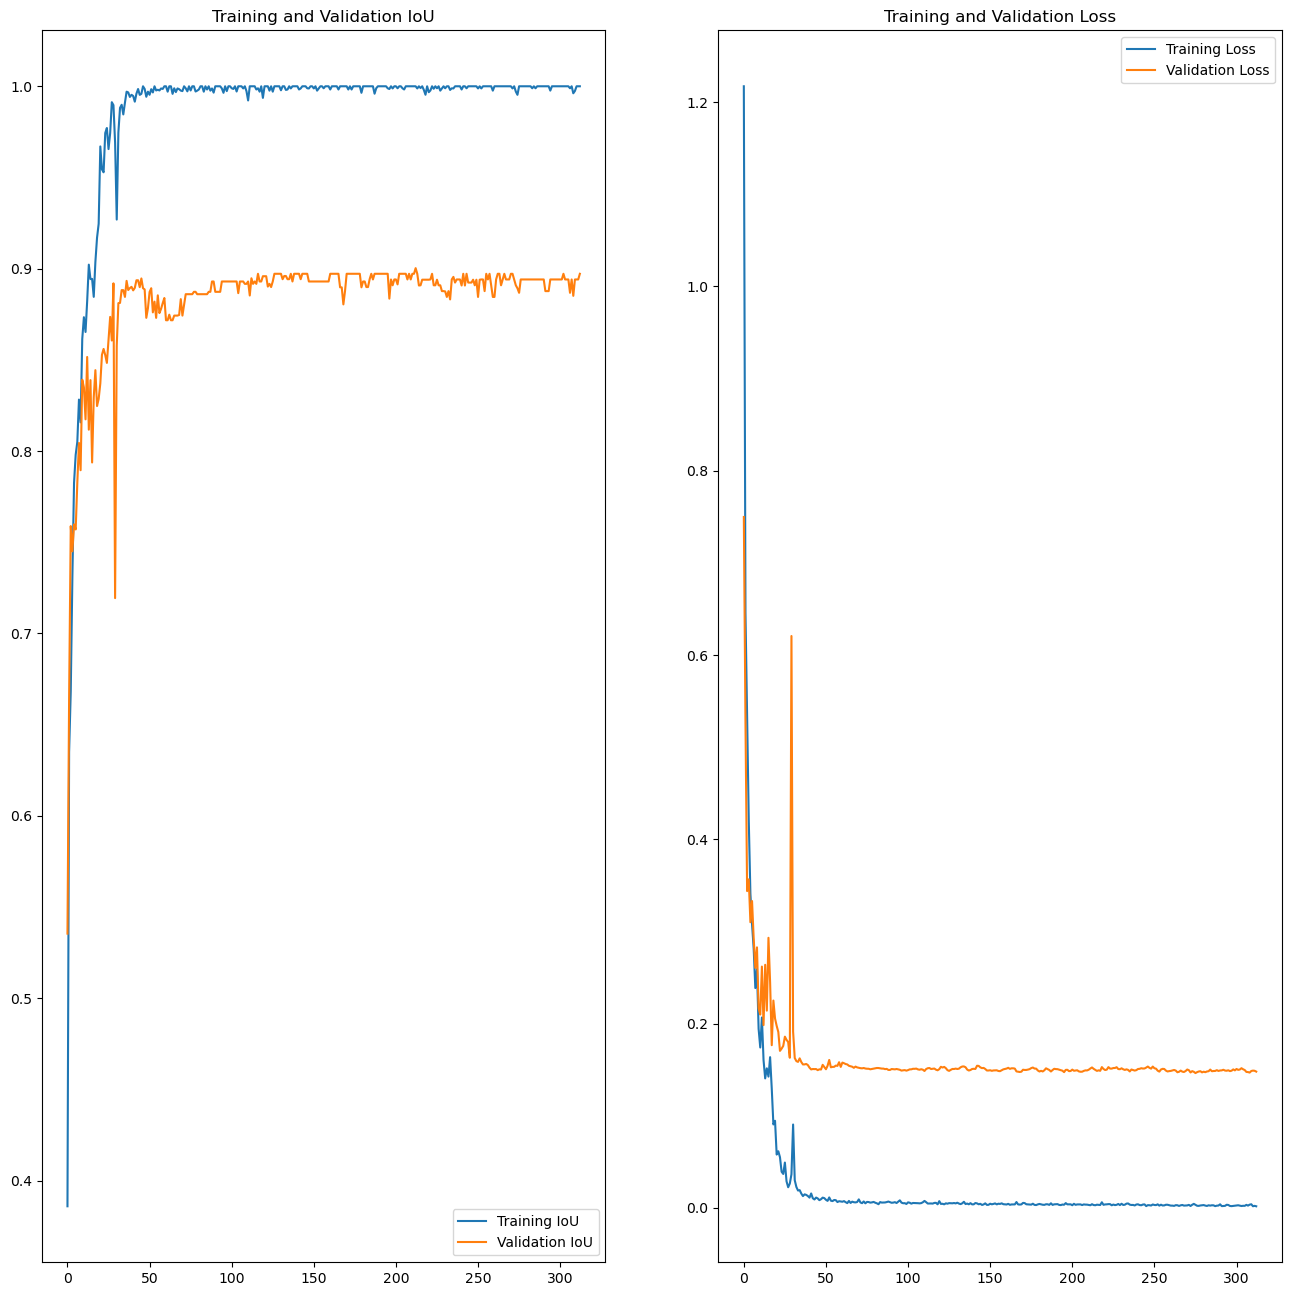

In [31]:
n_epochs = len(history.history['loss'])

acc = history.history['custom_mean_iou']
val_acc = history.history['val_custom_mean_iou']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(n_epochs) #change it based on epoch needed to finish building the model

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training IoU')
plt.plot(epochs_range, val_acc, label='Validation IoU')
plt.legend(loc='lower right')
plt.title('Training and Validation IoU')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

19/19 [==============================] - 1s 17ms/step


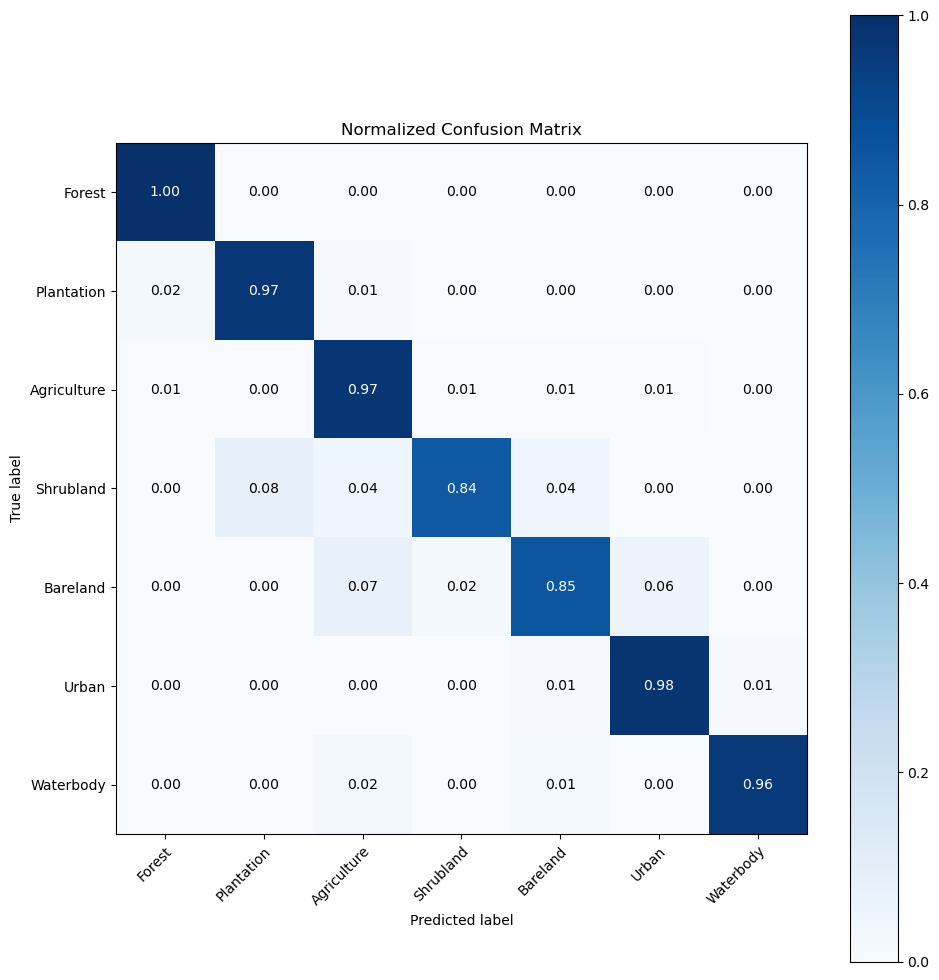

In [32]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

labels, counts = np.unique(y, return_counts=True)
labels = labels -1
classes = ['Forest','Plantation','Agriculture', 'Shrubland', 'Bareland', 'Urban', 'Waterbody']

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# plot the confusion matrix
dl_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(dl_cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)


# Show all labels
ax.set(xticks=np.arange(dl_cm.shape[1]),
        yticks=np.arange(dl_cm.shape[0]),
        xticklabels=classes, yticklabels=classes,
        title='Normalized Confusion Matrix',
        ylabel='True label',
        xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = dl_cm.max() / 2.
for i in range(dl_cm.shape[0]):
    for j in range(dl_cm.shape[1]):
        ax.text(j, i, format(dl_cm[i, j], fmt),
                ha="center", va="center",
                color="white" if dl_cm[i, j] > thresh else "black")
fig.tight_layout()

In [33]:
# Calculate per-class IoU and mean IoU from raw confusion matrix
def calculate_iou_from_cm(cm):
    n_classes = cm.shape[0]
    class_iou = np.zeros(n_classes)
    
    for i in range(n_classes):
        # True positives: diagonal elements
        tp = cm[i, i]
        
        # False positives: sum of column i minus diagonal element
        fp = np.sum(cm[:, i]) - tp
        
        # False negatives: sum of row i minus diagonal element
        fn = np.sum(cm[i, :]) - tp
        
        # IoU calculation
        if tp + fp + fn == 0:
            class_iou[i] = 0
        else:
            class_iou[i] = tp / (tp + fp + fn)
    
    # Calculate mean IoU
    mean_iou = np.mean(class_iou)
    
    return class_iou, mean_iou

# Use your raw confusion matrix (before normalization)
class_iou, mean_iou = calculate_iou_from_cm(cm)  # 'cm' is your raw confusion matrix

print("Class IoU values:")
for i, class_name in enumerate(classes):
    print(f"{class_name}: {class_iou[i]:.4f}")
print(f"Mean IoU: {mean_iou:.4f}")

Class IoU values:
Forest: 0.9516
Plantation: 0.9490
Agriculture: 0.9281
Shrubland: 0.7778
Bareland: 0.7931
Urban: 0.9500
Waterbody: 0.9524
Mean IoU: 0.9003


In [34]:
#Metric Precision, Recall, F-score support
from sklearn.metrics import precision_recall_fscore_support

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

macro_01 = precision_recall_fscore_support(y_test, y_pred, average='macro')
weighted_01 = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(macro_01)
print(weighted_01)

19/19 [==============================] - 0s 16ms/step
(0.9526114301727729, 0.9402940945034073, 0.9459065193465175, None)
(0.959239222780093, 0.9594594594594594, 0.9590272243072114, None)


In [35]:
#Metric F1-score
from sklearn.metrics import f1_score

macro_02 = f1_score(y_test, y_pred, average='macro')
weighted_02 = f1_score(y_test, y_pred, average='weighted')

print(macro_02)
print(weighted_02)

0.9459065193465175
0.9590272243072114


In [36]:
# Print the precision and recall, among other metrics
from sklearn import metrics
from tensorflow.compat.v1.keras.models import load_model

# model = load_model('D:/Wiltang_2022/Paper_Data_Codes/Saved_Model/LC_Multivariate_Wonosobo_BiGRU_exp_ver01_metricmeasurement.h5')
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
# y_test = y_test.argmax(axis=1)

print(metrics.classification_report(y_test, y_pred, digits=4))

19/19 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0     0.9516    1.0000    0.9752        59
           1     0.9789    0.9688    0.9738        96
           2     0.9509    0.9748    0.9627       159
           3     0.9130    0.8400    0.8750        25
           4     0.9200    0.8519    0.8846        54
           5     0.9661    0.9828    0.9744       116
           6     0.9877    0.9639    0.9756        83

    accuracy                         0.9595       592
   macro avg     0.9526    0.9403    0.9459       592
weighted avg     0.9592    0.9595    0.9590       592



In [37]:
import numpy as np
from sklearn.metrics import jaccard_score

y_pred_train = model.predict(X_train)
y_pred_train = y_pred_train.argmax(axis=1)
y_train = y_train.argmax(axis=1)

JS_test = jaccard_score(y_test, y_pred, average='macro')
JS_train = jaccard_score(y_train, y_pred_train, average='macro')
print(JS_test)
print(JS_train)

44/44 [==============================] - 1s 16ms/step
0.9002854837245691
1.0


In [38]:
import numpy as np
from sklearn.metrics import jaccard_score

y_pred_train = model.predict(X_train)
y_pred_train = y_pred_train.argmax(axis=1)
# y_train = y_train.argmax(axis=1)

JS_test = jaccard_score(y_test, y_pred, average=None)
JS_train = jaccard_score(y_train, y_pred_train, average=None)
print(JS_test)
print(JS_train)

44/44 [==============================] - 1s 15ms/step
[0.9516129  0.94897959 0.92814371 0.77777778 0.79310345 0.95
 0.95238095]
[1. 1. 1. 1. 1. 1. 1.]


In [39]:
from sklearn.metrics import cohen_kappa_score

model_kappa = cohen_kappa_score(y_pred, y_test)
print(model_kappa)

0.9506808801630086


In [ ]:
# data_test = {'ytest': y_test,
#         'ytest_pred': y_pred}

# data_train = {'ytest': y_train,
#         'ytest_pred': y_pred_train}

# df_test = pd.DataFrame(data_test)
# df_train = pd.DataFrame(data_train)

# df_test.to_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/df_test.csv')
# df_train.to_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/df_train.csv')

In [ ]:
# from tensorflow.keras.utils import plot_model
# import pydot
# import pydotplus
# from pydotplus import graphviz

# plot_model(model, to_file='D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Saved_Model/model3_plot.png', 
#            show_shapes=True, show_layer_names=True)